<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-Daily/blob/main/Heart_Disease_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Exploratory Data Analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Attribute information
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Load Data

In [14]:
data = pd.read_csv('Datasets/heart-analysis.csv')

# Get top 5 records

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Get bottom 5 records

In [16]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Find shape of dataset

In [17]:
data.shape

(1025, 14)

# Find information (Rows, Columns, Data types per column, Memory Requirement

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Check dataset if has null values

In [19]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Check duplicate data and drop

In [20]:
data_drop = data.duplicated().any()

In [21]:
data_drop

True

In [22]:
data = data.drop_duplicates()

In [23]:
data.shape

(302, 14)

# Get overall statistics

In [24]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Correlation matrix per column


<AxesSubplot:>

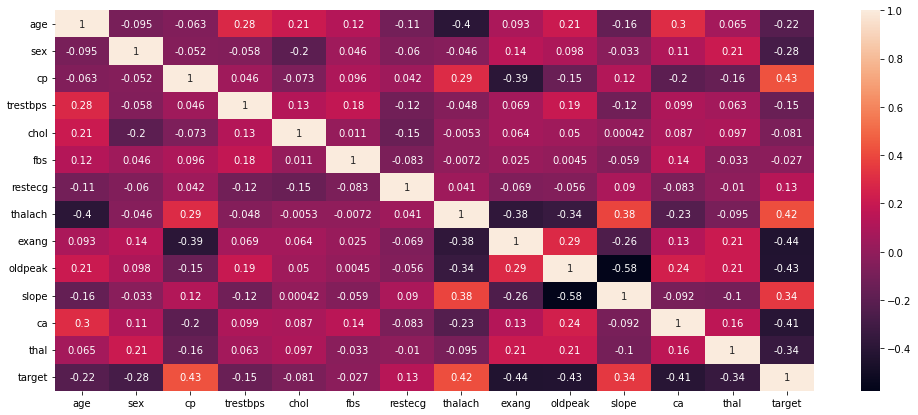

In [25]:
plt.figure(figsize=(17,7))
sns.heatmap(data.corr(), annot=True)

# Check How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [26]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

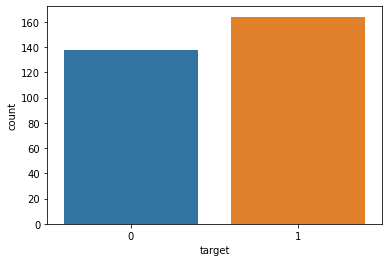

In [27]:
sns.countplot(data['target'])

# Find count of male and female in dataset

In [28]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


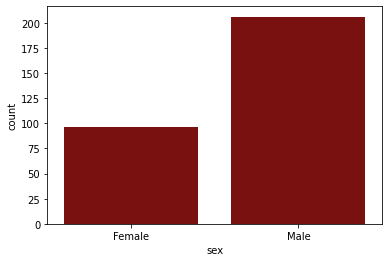

In [29]:
sns.countplot(data['sex'], color='darkred')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

# Find gender distribution according to target variable

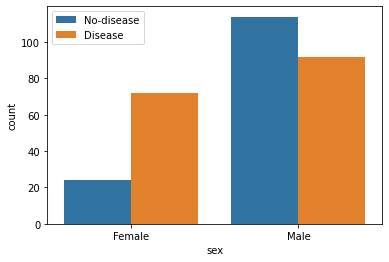

In [30]:
sns.countplot(x='sex', hue='target', data=data)
plt.xticks([1,0], ['Male', 'Female'])
plt.legend(labels=['No-disease', 'Disease'])
plt.show()

# Check age distribution in the dataset

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


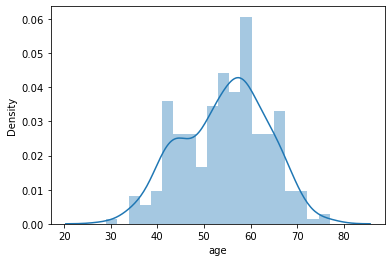

In [31]:
sns.distplot(data['age'], bins=20)
plt.show()

# Check chest pain type
- 0 - typical angina
- 1 - atypical angina
- 2 - non-anginal pain
- 3 - asymptomatic

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


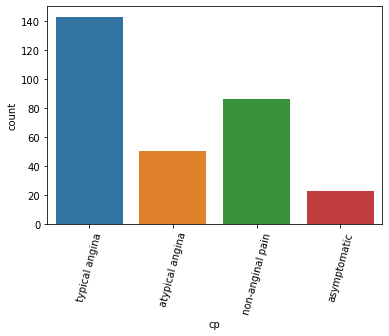

In [32]:
sns.countplot(data['cp'])
plt.xticks([0,1,2,3], ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.xticks(rotation=75)
plt.show()

# Show The Chest Pain Distribution As Per Target Variable

In [33]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

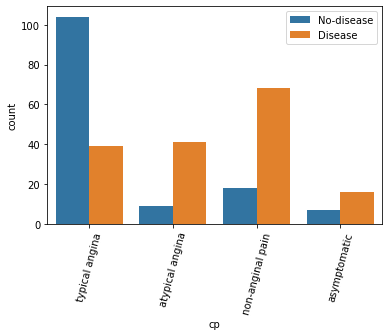

In [34]:
sns.countplot(x='cp', hue='target', data=data)
plt.xticks([0,1,2,3], ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.xticks(rotation=75)
plt.legend(labels=['No-disease', 'Disease'])
plt.show()

# Show Fasting Blood Sugar Distribution According To Target Variable

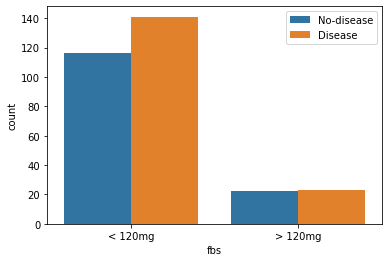

In [35]:
sns.countplot(x='fbs', hue='target', data=data)
plt.xticks([0,1], ['< 120mg','> 120mg'])
plt.legend(labels=['No-disease', 'Disease'])
plt.show()

# Check Resting Blood Pressure Distribution

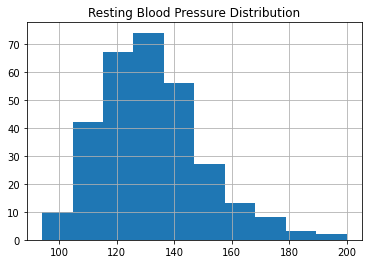

In [36]:
data['trestbps'].hist()
plt.title('Resting Blood Pressure Distribution')
plt.show()

# Compare Resting Blood Pressure As Per Sex Column

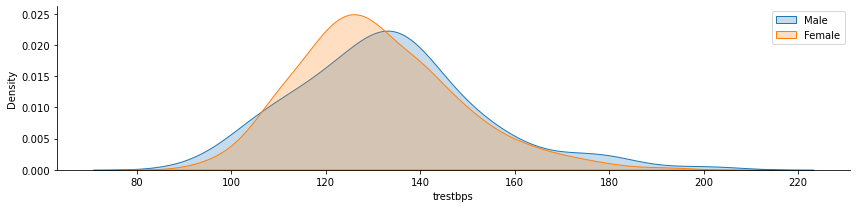

In [37]:
g = sns.FacetGrid(data, hue='sex', aspect=4)
g.map(sns.kdeplot,'trestbps', shade=True)
plt.legend(labels=['Male', 'Female'])

# Show Distribution of Serum cholesterol

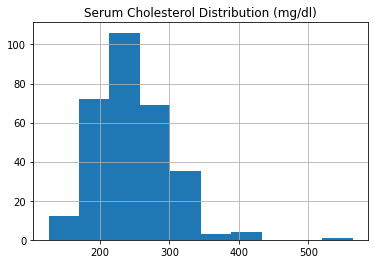

In [38]:
data['chol'].hist()
plt.title('Serum Cholesterol Distribution (mg/dl)')
plt.show()

# Plot Continuous Variables

In [39]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [40]:
cate_val = []
cont_val = []

for column in data.columns:
  if(data[column].nunique() <= 10):
    cate_val.append(column)
  else:
    cont_val.append(column)

cate_val, cont_val

(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'],
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

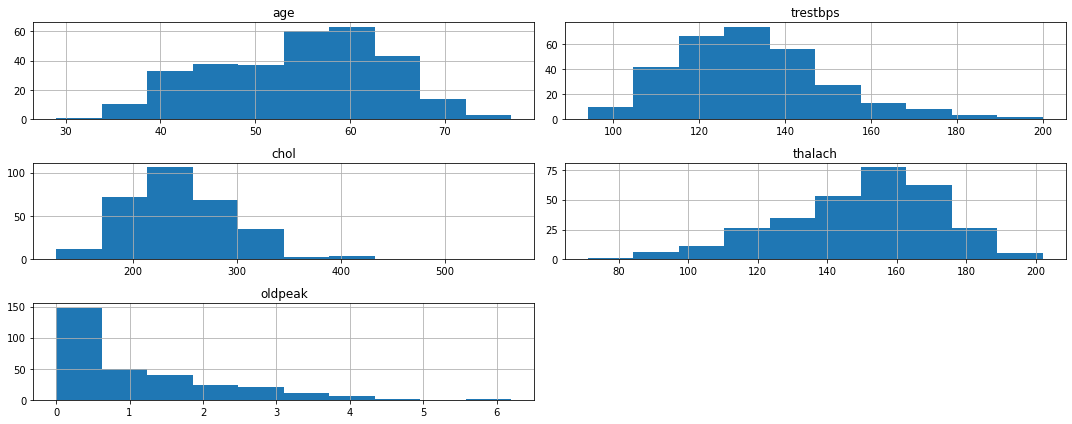

In [41]:
data.hist(cont_val, figsize=(15,6))
plt.tight_layout()
plt.show()